# III. Question

## Nội dung

###  Asset Turnover Ratio  (ATR) là một trong những chỉ số để đánh giá sự hiệu quả sử dụng tài sản cũng như hiệu quả kinh doanh của doanh nghiệp. Vậy lĩnh vực nào có chỉ số  Asset Turnover Ratio cao nhất, thấp nhất ?

## Mục đích:

- Tìm ra những lĩnh vực mà ở đó các công ty thường có chỉ số ATR cao, thấp.
- Để hiểu rõ hơn về chỉ số ATR và cách sử dụng nó để đánh giá hiệu quả sử dụng tài sản của các doanh nghiệp thuộc các lĩnh vực khác nhau.
- Hiểu rõ hơn về những yếu tố ảnh hưởng đến ATR của các lĩnh vực. 
- Cung cấp thông tin cho các nhà đầu tư, nhà quản trị doanh nghiệp và các bên liên quan khác về hiệu quả sử dụng tài sản của các doanh nghiệp thuộc các lĩnh vực khác nhau, từ đó giúp họ đưa ra các quyết định kinh doanh hiệu quả hơn.
- Tránh được những so sánh không chính xác giữa các doanh nghiệp thuộc các lĩnh vực khác nhau, từ đó giúp các nhà đầu tư đưa ra các quyết định đầu tư chính xác hơn.

## Import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import re

## Load dataset đã được tạo

In [2]:
companies_df = pd.read_csv("../Data/preprocessed/cleaned_dataset.csv")

1. Tính toán Asset Turnover Ratio cho từng dòng

`Asset Turnover (Vòng quay tài sản) = Revenue (Doanh thu) / Total Assets (Tổng tài sản)`   
Vòng quay tổng tài sản hay được gọi là Asset Turnover Ratio, đây là một chỉ số tài chính, thước đo đánh giá hiệu quả sử dụng tài sản của một doanh nghiệp. Chỉ số này thể hiện việc sử dụng tài sản của công ty cho mục đích kinh doanh hiệu quả đến đâu.

In [3]:
companies_df['ATR'] = companies_df['Revenue ($B)'] / companies_df['Total Assets ($B)']

In [4]:
companies_df.sample(5)

,Company,Year,EPS ($),Earnings ($B),Revenue ($B),Marketcap ($B),Total Debts ($B),Net Assets ($B),Total Assets ($B),Cash on hand ($B),Country,Share price ($),Categories,ATR
4045,Fiserv,2003,1.93500,0.510,3.03,7.68,0.83,2.19,7.21,0.20,USA,132.36,"Financial services, Tech",0.420250
37445,Sino Biopharmaceutical,2022,0.02124,0.800,3.50,11.10,2.02,5.50,9.28,2.45,China,0.43,Pharmaceuticals,0.377155
22369,George Weston,2010,3.06000,1.060,31.15,10.87,6.20,8.73,20.86,4.76,Canada,118.88,Food,1.493289
19386,Centrais Electricas Brasileiras,2003,0.56500,1.715,11.29,10.11,14.09,21.41,54.49,4.46,Brazil,8.34,"Electricity, Utility companies, Energy",0.207194
25050,Fox Corporation,2020,2.54000,2.120,12.66,17.27,7.94,10.41,21.75,4.64,USA,28.01,MediaPress,0.582069


2. Tìm ra danh sách các lĩnh vực

In [5]:
all_categories = []

for categories_str in companies_df['Categories']:
    categories = categories_str.split(', ')  
    all_categories.extend(categories)  
    

unique_categories = list(set(all_categories))
print("Số lĩnh vực là:", len(unique_categories))

Số lĩnh vực là: 132


In [6]:
category_ATR = {}


for category in unique_categories:
    category_data = companies_df[companies_df['Categories'].str.contains(category, na=False)]    
    # Tính trung vị ATR cho category 
    category_ATR[category] = category_data['ATR'].median()



3. Vẽ biểu đồ biểu diễn 20 lĩnh vực có chỉ sô ART cao nhất

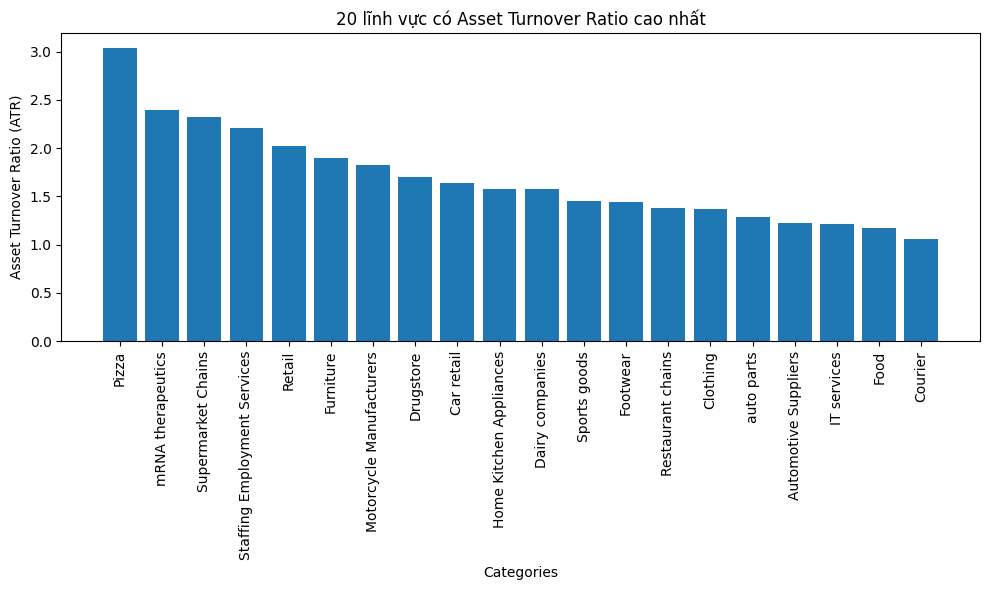

In [7]:
# Tạo biểu đồ bar chart cho top 10 categories với giá trị ATR tương ứng
top_categories = sorted(category_ATR, key=category_ATR.get, reverse=True)[:20]  
plt.figure(figsize=(10, 6))
plt.bar(top_categories, [category_ATR[cat] for cat in top_categories])
plt.xlabel('Categories')
plt.ylabel('Asset Turnover Ratio (ATR)')
plt.title('20 lĩnh vực có Asset Turnover Ratio cao nhất')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Nhận xét: 
- Đa phần các lĩnh vực nằm trong nhóm dịch vụ hoặc bán lẻ. 
- Dịch vụ (Courier, Staffing Employment Services, IT Service,...): Các ngành dịch vụ thường có chi phí đầu tư ban đầu thấp và dựa vào nguồn nhân lực, cho phép họ tạo ra doanh thu cao từ tài sản tương đối nhỏ.
- Bán lẻ (Retail): Do nhu cầu mua sắm của người dân ngày càng tăng, lĩnh vực bán lẻ thường có doanh thu cao. Ngoài ra, các công ty bán lẻ thường có cấu trúc tài sản đơn giản, với ít tài sản cố định. Do đó, ATR của các công ty bán lẻ thường cao.
- Lĩnh vực thực phẩm và hàng tiêu dùng (Sports goods, Footwear, Home Kitchen Appliances ):nhu cầu ổn định, có chu kỳ kinh doanh ngắn, chỉ từ vài ngày đến vài tháng. Điều này giúp doanh nghiệp trong lĩnh vực thu hồi vốn nhanh chóng, từ đó cải thiện tỷ suất lợi nhuận.


- Các lĩnh vực trong danh sách đều có điểm chung là nhu cầu tiêu dùng cao, sử dụng nhiều nhân lực. Điều này dẫn đến doanh thu lớn và chu kỳ kinh doanh ngắn.

4. Vẽ biểu đồ biểu diễn 20 lĩnh vực có chỉ sô ART thấp nhất

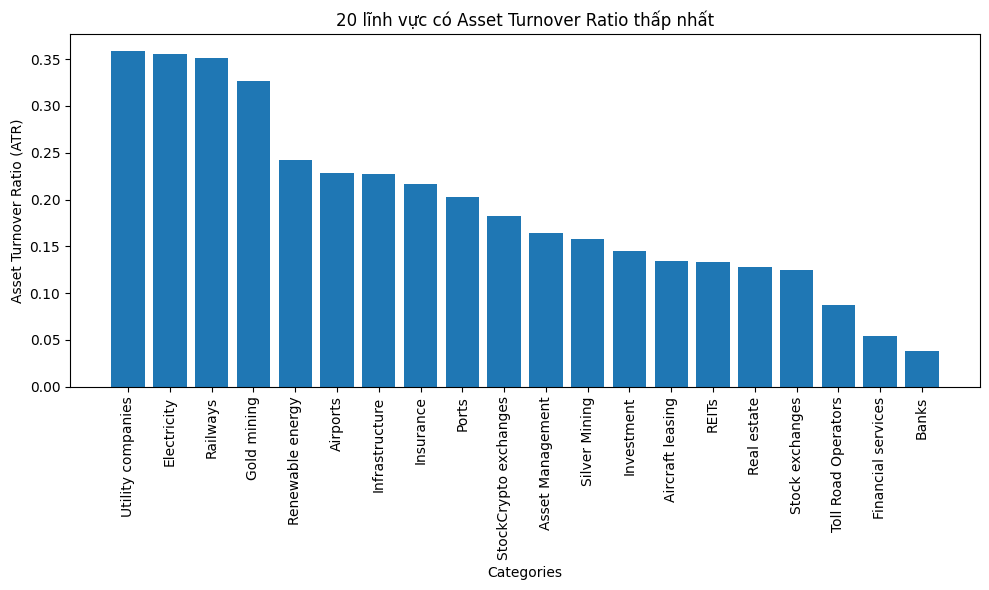

In [8]:
bottom_categories = sorted(category_ATR, key=category_ATR.get, reverse=True)[-20:]  

plt.figure(figsize=(10, 6))
plt.bar(bottom_categories, [category_ATR[cat] for cat in bottom_categories])
plt.xlabel('Categories')
plt.ylabel('Asset Turnover Ratio (ATR)')
plt.title('20 lĩnh vực có Asset Turnover Ratio thấp nhất')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Ta có thể chia các lĩnh vực có chỉ số ATR thấp thành các nhóm:
- Nhóm tài sản cố định lớn:
  - Liên quan đến cơ sở hạ tầng, tiện ích công cộng (Utility companies, Electricity, Railways, Airports, Infrastructure, Ports): Các lĩnh vực đòi hỏi đầu tư ban đầu cao. Doanh thu có thể ổn định nhưng tăng trưởng chậm, dẫn đến ATR thấp.
  - Khai thác (Gold mining, Silver Mining): Cần đầu tư vào hệ thống khai thác, chế biến, mất thời gian thu hồi vốn, do đó ATR thấp.
 - Nhóm chu kỳ kinh doanh dài:
   - Năng lượng tái tạo (Renewable energy): Các dự án năng lượng tái tạo thường đòi hỏi vốn đầu tư lớn ban đầu và thời gian hoàn vốn dài, dẫn đến ATR thấp.
   - Lĩnh vực liên quan đến bất động sản (Real estate, REITS): Bất động sản có đặc điểm là tài sản lớn, thời gian giao dịch mua bán lâu, do đó ATR thường thấp.
 - Nhóm lĩnh vực tài chính:
   - Financial services, Banks: sở hữu một số tài sản lớn nhưng các tài sản này không được sử dụng trực tiếp để tạo ra doanh thu mà thường được sử dụng để đảm bảo tính thanh khoản và đáp ứng yêu cầu quy định.
   - Investment, Asset Management: Quản lý đầu tư tập trung vào lợi nhuận dài hạn, ATR trong ngắn hạn có thể thấp.

#### Nhận xét chung
- Có sự khác biệt lớn về chỉ số ATR giữa 2 nhóm.
- Chỉ số ART của 20 nhóm cao nhất đều trên 1.
- Chỉ số ART của 20 nhóm thấp nhất đều dưới 1.


Sự khác biệt này có thể là do:
- Các lĩnh vực có chi phí đầu tư ban đầu thấp, sử dụng nhiều nhân lực và có chu kỳ kinh doanh ngắn thường có chỉ số ATR cao. Ngược lại, các lĩnh vực có chi phí đầu tư ban đầu cao, sử dụng ít nhân lực và có chu kỳ kinh doanh dài thường có chỉ số ATR thấp.
- Các lĩnh vực có cấu trúc tài sản có nhiều tài sản lưu động như bán lẻ thường có chỉ số ATR cao hơn các lĩnh vực có cấu trúc tài sản có nhiều tài sản cố định như tài chính, bất động sản. Điều này là do các tài sản lưu động có thể nhanh chóng được chuyển đổi thành doanh thu.
- Các lĩnh vực như bán lẻ, dịch vụ, buôn bán nhu yếu phẩm có chiến lược kinh doanh tập trung vào việc bán nhiều sản phẩm với giá thấp thường có chỉ số ATR cao hơn các lĩnh vực có chiến lược kinh doanh tập trung vào việc bán ít sản phẩm với giá cao.

#### Vậy những ngành có chỉ số ATR thấp hơn các ngành khác có nghĩa là ngành đó có khả năng sinh lời kém hơn  ?
- Không hoàn toàn như vậy. Các ngành có chỉ số ATR thấp vẫn có khả năng sinh lời cao. Ví dụ, các ngành có chi phí đầu tư ban đầu cao thường có chỉ số ATR thấp. Tuy nhiên, nếu các ngành này có lợi nhuận cao thì vẫn có khả năng sinh lời cao.
- Nhìn vào biểu đồ và quan sát thực tế, có vẻ như các lĩnh vực có ATR cao thường có biên độ lợi nhuận thấp, còn các lĩnh vực có ATR thấp thường có biên độ lợi nhuận cao.

Ta sẽ chứng minh điều này thông qua Earning Margin

1. Tính earning margin
`Earnings margin` là tỷ lệ phần trăm của doanh thu được chuyển thành lợi nhuận.Chỉ số này phản ánh khả năng tạo ra lợi nhuận của một công ty từ mỗi đơn vị doanh thu.

Các công ty có Earning Margin cao thường có khả năng tạo ra lợi nhuận cao hơn trên mỗi đơn vị doanh thu.

In [9]:
companies_df['Earnings Margin'] = (companies_df['Earnings ($B)'] / companies_df['Revenue ($B)']) * 100
companies_df.sample(5)

,Company,Year,EPS ($),Earnings ($B),Revenue ($B),Marketcap ($B),Total Debts ($B),Net Assets ($B),Total Assets ($B),Cash on hand ($B),Country,Share price ($),Categories,ATR,Earnings Margin
6312,Humana,2013,7.78000,2.0600,41.31,15.89,3.00000,9.31,20.73,9.22000,USA,481.62,Insurance,1.992764,4.986686
35915,Rakuten,2011,-0.06473,-0.1400,4.79,13.96,4.50000,3.05,24.85,2.14000,Japan,4.02,"ECommerce, Internet, Tech",0.192757,-2.922756
8854,IDEXX Laboratories,2001,0.28000,0.0617,0.38,0.96,0.00838,0.30,0.37,0.07955,USA,531.35,Diagnostics and Testing,1.027027,16.236842
31089,Recordati,2007,1.28000,0.3600,1.29,1.75,0.26000,0.57,1.10,0.19000,Italy,50.40,"Pharmaceuticals, Biotech",1.172727,27.906977
10003,TC Energy,2002,1.14000,6.5000,3.88,6.95,8.20000,5.00,14.64,0.58000,Canada,38.01,"OilGas, Transportation, Energy, Infrastructure",0.265027,167.525773


In [10]:
category_EM = {}
for category in unique_categories:
    
    category_data = companies_df[companies_df['Categories'].str.contains(category, na=False)]
    # Tính trung vị cho category 
    category_EM[category] = category_data['Earnings Margin'].median()


2. Vẽ biểu đồ để so sánh earnings margin giữa hai nhóm có chỉ số ART cao nhất và thấp nhất

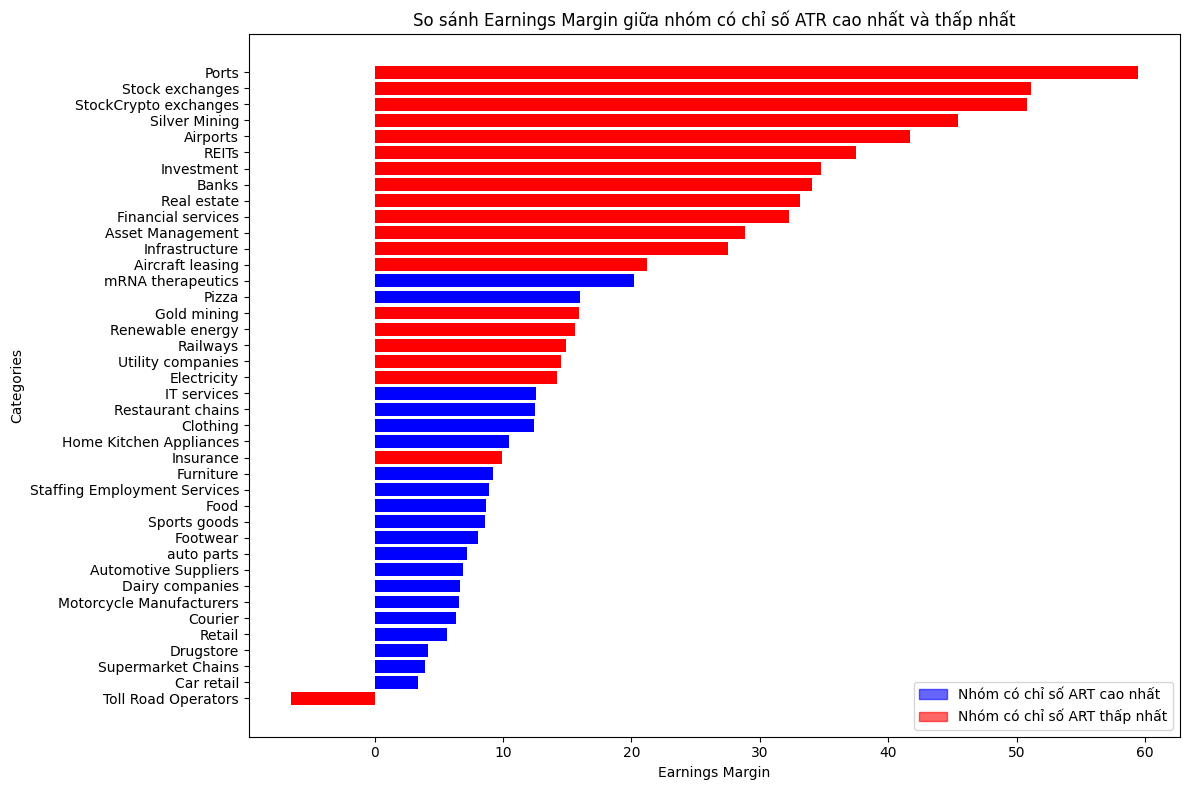

In [12]:

all_categories = top_categories + bottom_categories
all_earnings_margin_em = [category_EM[cat] for cat in all_categories]

sorted_categories = [x for _, x in sorted(zip(all_earnings_margin_em, all_categories), reverse=True)]
sorted_earnings_margin_em = sorted(all_earnings_margin_em, reverse=True)
category_colors = ['blue' if category in top_categories else 'red' for category in sorted_categories]

plt.figure(figsize=(12, 8))
plt.barh(sorted_categories, sorted_earnings_margin_em, color=category_colors)

plt.xlabel('Earnings Margin')
plt.ylabel('Categories')
plt.title('So sánh Earnings Margin giữa nhóm có chỉ số ATR cao nhất và thấp nhất')



handles = [plt.Rectangle((0,0),1,1, color='blue', alpha=0.6), plt.Rectangle((0,0),1,1, color='red', alpha=0.6)]
labels = ['Nhóm có chỉ số ART cao nhất', 'Nhóm có chỉ số ART thấp nhất']
plt.legend(handles, labels)

plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()


Nhận xét:
- Đúng như dự đoán, các lĩnh vực có chỉ số ATR cao có xu hướng có Margin Earning thấp hơn.

### Kết luận
- Tỷ suất doanh thu trên tài sản (ATR) là một chỉ số tài chính quan trọng giúp đánh giá hiệu quả sử dụng tài sản của doanh nghiệp. Tuy nhiên, chỉ số này có thể thay đổi đáng kể tùy theo ngành. Các ngành có biên độ lợi nhuận thấp có xu hướng tạo ra tỷ suất cao hơn, trong khi các ngành thâm dụng vốn có xu hướng báo cáo tỷ suất thấp hơn.
- Các lĩnh vực bán lẻ, dịch vụ, kinh doanh đồ gia dụng, thực phẩm có chỉ số ATR cao.
- Các lĩnh vực liên quan đến cơ sơ hạ tầng, tài chính, bất động sản có chỉ số STR thấp. 
- Chỉ số ATR phản ánh sự hiệu quả sử dụng tài sản của một công ty. Tuy nhiên, các ngành nghề khác nhau có đặc điểm kinh doanh khác nhau, dẫn đến chi phí đầu tư, cấu trúc tài sản, chu kỳ kinh doanh,... khác nhau. Điều này ảnh hưởng đến chỉ số ATR của doanh nghiệp. Do đó, chỉ nên sử dụng chỉ số ATR để so sánh các công ty trong cùng một lĩnh vực.